In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from keras.datasets import mnist 

(xtrain, ytrain),(xtest,ytest) = mnist.load_data()

print('Train: X = {}, y = {}'.format(xtrain.shape, ytrain.shape)) 
print('Test: X = {}, y = {}'.format(xtest.shape, ytest.shape))


11501568/11490434 [==============================] - 0s 0us/step
Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [4]:
xtrain.size

47040000

In [5]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
xtrain = tf.keras.utils.normalize(xtrain)
xtest = tf.keras.utils.normalize(xtest)

In [14]:
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

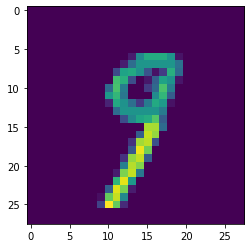

In [15]:
plt.imshow(xtrain[43])

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2637 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0741 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0562 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0438 - accuracy: 0.9853


In [27]:
val_loss,val_acc = model.evaluate(xtest,ytest)
print(val_loss,val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9752
0.07953395694494247 0.9751999974250793


In [30]:
pred = model.predict(xtest)

In [34]:
import numpy as np

print(np.argmax(pred[26]))

7


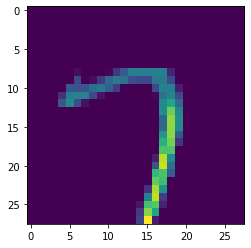

In [35]:
plt.imshow(xtest[26])